<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Électrocinétique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Électrocinétique numérique | Filtrage numérique
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Échantillonnage

## Notion d'échantillonnage

<b>ATTENTION : par essence un affichage `python` est nécessairement discret et donc échantillonné. La liste `t_an` est en fait l'équivalent des instans où l'échantillonneur mesure le signal et `s_an(t_an)` est le résultat de cette mesure.</b>

Pour une meilleure compréhension, on considèrera néanmoins que $s_\text{an}$ est un signal analogique (donc continu) et sera représenté en traits pleins. Le résultats de l'échantillonnage $s_\text{ech}$ sera représenté par une suite de points discrets.

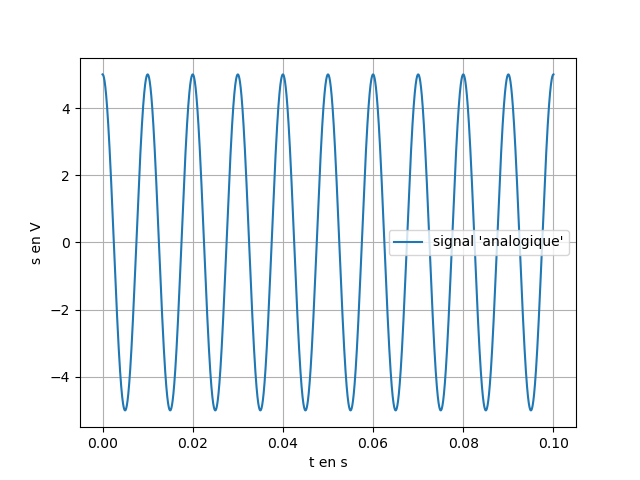

In [2]:
S0 = 5 # amplitude du signal analogique
f_an = 100 # fréquence du signal analogique

def s_an(t):
    return S0*np.cos(2*np.pi*f_an*t)

Delta_t_an = 1e-1 # durée du signal analogique

t_an = np.linspace(0,Delta_t_an,10000) # instants où le signal est calculé

plt.figure()
plt.plot(t_an,s_an(t_an),'-', label="signal 'analogique'")
plt.legend()
plt.xlabel('t en s')
plt.ylabel('s en V')
plt.grid(True)
plt.show()

Pour échantillonner ce signal et limiter son extension temporelle, on peut utiliser le *slicing* des `np.array`. C'est le choix qui a été fait ici : le tableau `t_ech` ne contient qu'un point sur 20 parmi les 50000 premiers points de `t_an`. Il en est de même pour `s_ech`.

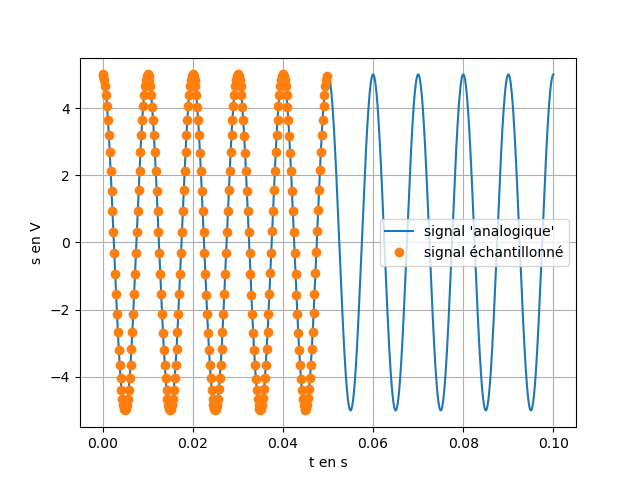

In [3]:
t_ech = t_an[:5000:20] # instants d'échantillonnage
s_ech = s_an(t_an)[:5000:20] # valeurs échantillonnées

plt.figure()
plt.plot(t_an,s_an(t_an),'-', label="signal 'analogique'")
plt.plot(t_ech, s_ech,'o', label="signal échantillonné")
plt.legend()
plt.xlabel('t en s')
plt.ylabel('s en V')
plt.grid(True)
plt.show()

## Influence de la fréquence d'échantillonnage

Dans cette partie on continue de s'appuyer sur un signal supposé analogique décrit par la fonction `s_an` en prenant pour fréquence `f_an`et pour durée `Delta_t_an`. 
<br>

On choisit alors les paramètres d'échantillonnage `Delta_t_ech` et `f_ech`. Le nombre de points requis s'en déduit grâce à $$N_\text{ech}=1+\dfrac{\Delta t_\text{ech}}{T_\text{ech}} = 1+\Delta t_\text{ech}\times f_\text{ech}$$


In [4]:
Delta_t_ech = Delta_t_an # durée de l'échantillonnage

f_ech = f_an * 20 # fréquence d'échantillonnage
N_ech = np.int64(1+Delta_t_ech*f_ech) # nombre d'échantillons
t_ech = np.linspace(0, Delta_t_ech, N_ech)

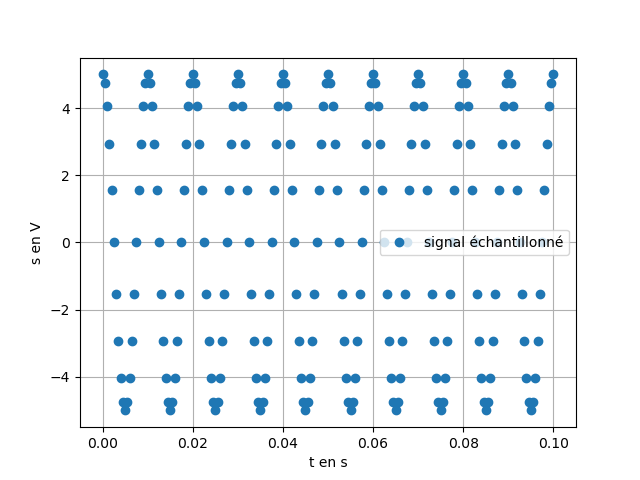

In [5]:
plt.figure()
#plt.plot(t_an,s_an(t_an),'-', label="signal 'analogique'")
plt.plot(t_ech,s_an(t_ech), 'o', label="signal échantillonné")
plt.legend()
plt.xlabel('t en s')
plt.ylabel('s en V')
plt.grid(True)
plt.show()

On peut alors extraire de ce signal sa représentation fréquentielle, en utilisant la fonction `np.fft.rfft()`. 
<br>
Le signal est normalisé de façon à récupérer la bonne valeur d'amplitude, et le tableau des fréquences associées est également recalculé à l'aide de la fonction `np.fft.rfftfreq()` (cf. <a href="https://numpy.org/doc/stable/reference/routines.fft.html">doc.</a>).

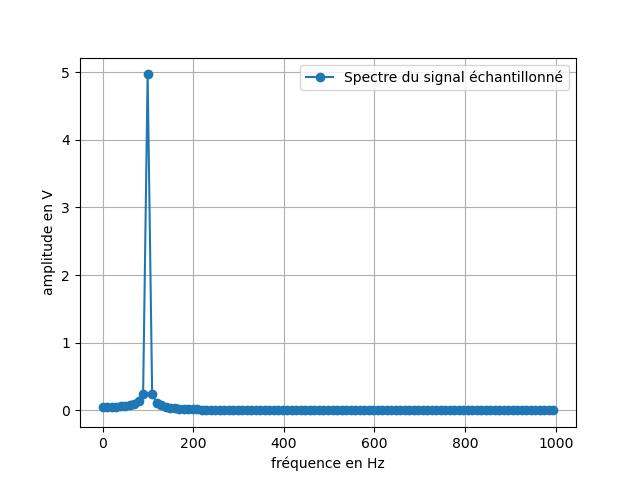

La fréquence mesurée sur le signal échantillonné est :  9.95e+01 +/- 5.745e+00  Hz
L'erreur relative est de :  5.0e-01  %
L'amplitude associée à cette fréquence est :  4.97e+00  V
L'erreur relative est de :  6.5e-01  %
Le nombre de points stockés est :  201
Le temps de cacul estimé du spectre est : 
16.6 µs ± 92.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
amp = np.abs(np.fft.rfft(s_an(t_ech)/(np.int64(1+Delta_t_ech*f_ech)//2+1)))
freq = np.fft.rfftfreq(len(s_an(t_ech)), d=1/f_ech)

plt.figure()
plt.plot(freq,amp,'-o',label='Spectre du signal échantillonné')
plt.legend()
plt.xlabel('fréquence en Hz')
plt.ylabel('amplitude en V')
plt.grid(True)
plt.show()

print("La fréquence mesurée sur le signal échantillonné est : ",format(freq[np.argmax(amp)],"#.2e"),"+/-", format((freq[1]-freq[0])/np.sqrt(3),"#.3e"), " Hz")
print("L'erreur relative est de : ", format(np.abs(100*(freq[np.argmax(amp)]-f_an)/f_an), "#.1e"), " %")
print("L'amplitude associée à cette fréquence est : ",format(amp[np.argmax(amp)],"#.2e"), " V")
print("L'erreur relative est de : ", format(np.abs(100*(amp[np.argmax(amp)]-S0)/S0), "#.1e"), " %")
print("Le nombre de points stockés est : ", N_ech)
print("Le temps de cacul estimé du spectre est : ")
%timeit amp = np.abs(np.fft.rfft(s_an(t_ech)/(np.int64(1+Delta_t_ech*f_ech)//2+1))) # ne permet que d'évaluer le temps de calcul

La valeur calculée de la fréquence ainsi que l'amplitude associée dépend donc fortement de la fréquence d'échantillonnage choisie : plus celle-ci est élevée, meilleur semble le résultat. L'incertitude-type sur le calcul (écart entre deux valeurs consécutives de fréquences) est par contre indépendant du choix de la fréquence d'échantillonnage.

<br>
On remarque par ailleurs qu'en dessous de $f_\text{ech}=2f_\text{an}$, la valeur calculée est totalement fausse.

## Influence de la durée de l'échantillonnage

On reprend la démarche précédente mais cette fois en fixant `f_ech` et en faisant varier `Delta_t_ech`.


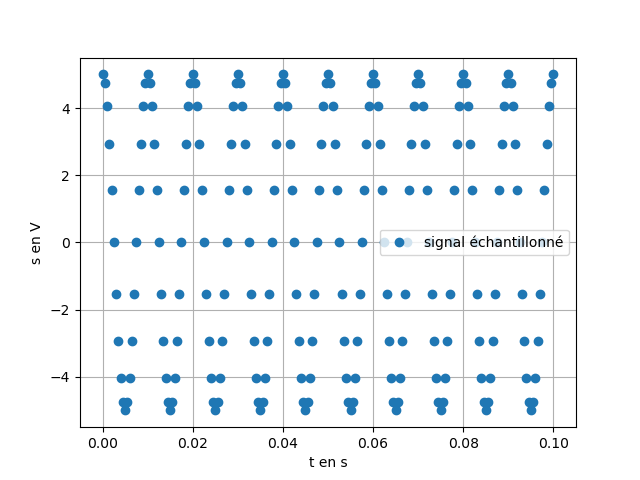

In [7]:
f_ech = f_an * 20 # fréquence d'échantillonnage

Delta_t_ech = Delta_t_an*1 # durée de l'échantillonnage
N_ech = np.int64(1+Delta_t_ech*f_ech) # nombre d'échantillons
t_ech = np.linspace(0, Delta_t_ech, N_ech)

plt.figure()
#plt.plot(t_an,s_an(t_an),'-', label="signal 'analogique'")
plt.plot(t_ech,s_an(t_ech), 'o', label="signal échantillonné")
plt.legend()
plt.xlabel('t en s')
plt.ylabel('s en V')
plt.grid(True)
plt.show()

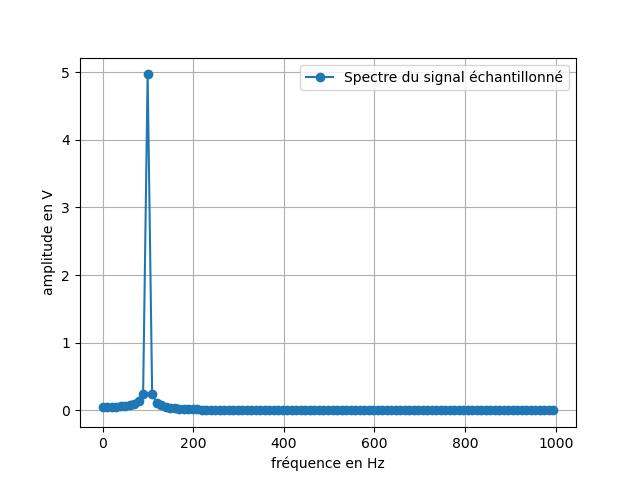

La fréquence mesurée sur le signal échantillonné est :  9.95e+01 +/- 5.745e+00  Hz
L'erreur relative est de :  5.0e-01  %
L'amplitude associée à cette fréquence est :  4.97e+00  V
L'erreur relative est de :  6.5e-01  %
Le nombre de points stockés est :  201
Le temps de cacul estimé du spectre est : 
16.5 µs ± 19.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
amp = np.abs(np.fft.rfft(s_an(t_ech)/(np.int64(1+Delta_t_ech*f_ech)//2+1)))
freq = np.fft.rfftfreq(len(s_an(t_ech)), d=1/f_ech)

plt.figure()
plt.plot(freq,amp,'-o',label='Spectre du signal échantillonné')
plt.legend()
plt.xlabel('fréquence en Hz')
plt.ylabel('amplitude en V')
plt.grid(True)
plt.show()

print("La fréquence mesurée sur le signal échantillonné est : ",format(freq[np.argmax(amp)],"#.2e"),"+/-", format((freq[1]-freq[0])/np.sqrt(3),"#.3e"), " Hz")
print("L'erreur relative est de : ", format(np.abs(100*(freq[np.argmax(amp)]-f_an)/f_an), "#.1e"), " %")
print("L'amplitude associée à cette fréquence est : ",format(amp[np.argmax(amp)],"#.2e"), " V")
print("L'erreur relative est de : ", format(np.abs(100*(amp[np.argmax(amp)]-S0)/S0), "#.1e"), " %")
print("Le nombre de points stockés est : ", N_ech)
print("Le temps de cacul estimé du spectre est : ")
%timeit amp = np.abs(np.fft.rfft(s_an(t_ech)/(np.int64(1+Delta_t_ech*f_ech)//2+1))) # ne permet que d'évaluer le temps de calcul

On remarque qu'une augmentation de la durée d'acquisition semble améliorer la qualité de la mesure de la fréquence ainsi que l'insertitude-type telle que définie précédemment.

# Condition de Nyquist-Shannon
## Repliement spectral
Afin de mettre en évidence la notion de repliement spectral, on modifie le signal analogique précédent en lui ajoutant un bruit d'amplitude non négligeable à plus haute fréquence. 

<br>
On modifie donc la fonction `s_an` sans pour autant toucher aux autres paramètres analogiques.

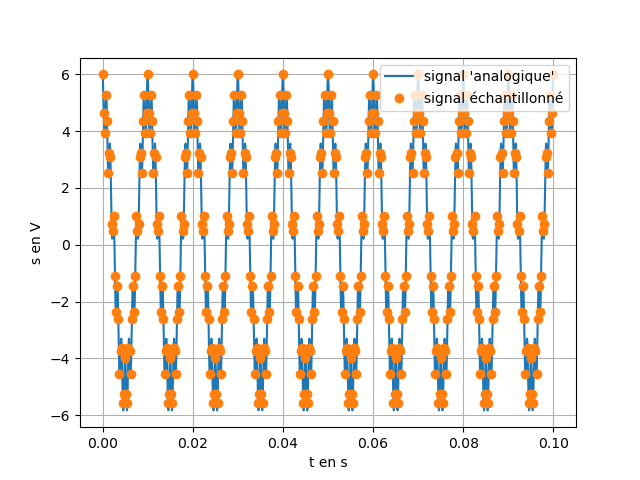

In [9]:
S0 = 5 # amplitude du signal analogique
f_an = 100 # fréquence du signal analogique
Delta_t_an = .1 # durée du signal analogique
t_an = np.linspace(0,Delta_t_an,10000) # instants où le signal est calculé

def s_an(t):
    return S0*np.cos(2*np.pi*f_an*t)

f_eps = 12*f_an # fréquence du bruit

def s_an_bruit(t):
    return S0*np.cos(2*np.pi*f_an*t) + S0/5*np.cos(2*np.pi*f_eps*t)

f_ech = 40*f_an
Delta_t_ech = Delta_t_an
N_ech = N_ech = np.int64(1+Delta_t_ech*f_ech)
t_ech = np.linspace(0,Delta_t_ech,N_ech)

plt.figure()
plt.plot(t_an,s_an_bruit(t_an),'-', label="signal 'analogique'")
plt.plot(t_ech, s_an_bruit(t_ech),'o', label="signal échantillonné")
plt.legend()
plt.xlabel('t en s')
plt.ylabel('s en V')
plt.grid(True)
plt.show()

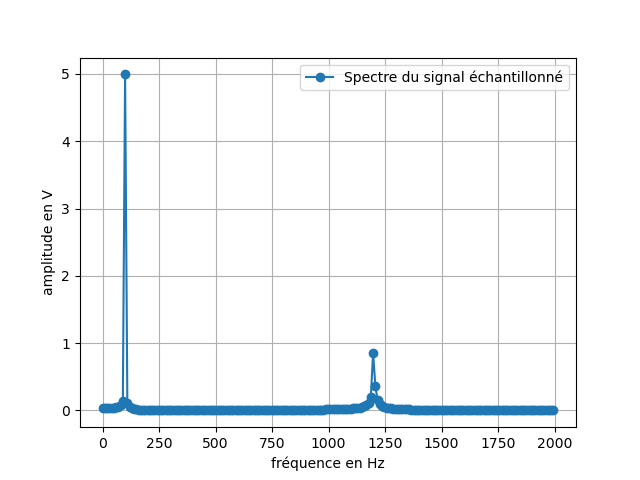

La fréquence fondamentale du signal échantillonné est :  9.98e+01 +/- 5.759e+00  Hz
L'erreur relative est de :  2.5e-01  %
L'amplitude associée à cette fréquence est :  4.99e+00  V
L'erreur relative est de :  1.3e-01  %
La fréquence de la première harmonique du signal échantillonné est :  1.187e+03 +/- 5.759e+00  Hz
L'erreur relative est de :  1.1e+00  %
L'amplitude associée à cette fréquence est :  8.58e-01  V
L'erreur relative est de :  1.4e+01  %


In [10]:
amp = np.abs(np.fft.rfft(s_an_bruit(t_ech)/(np.int64(1+Delta_t_ech*f_ech)//2+1)))
freq = np.fft.rfftfreq(len(s_an(t_ech)), d=1/f_ech)

plt.figure()
plt.plot(freq,amp,'-o',label='Spectre du signal échantillonné')
plt.legend()
plt.xlabel('fréquence en Hz')
plt.ylabel('amplitude en V')
plt.grid(True)
plt.show()

print("La fréquence fondamentale du signal échantillonné est : ",format(freq[np.argmax(amp)],"#.2e"),"+/-", format((freq[1]-freq[0])/np.sqrt(3),"#.3e"), " Hz")
print("L'erreur relative est de : ", format(np.abs(100*(freq[np.argmax(amp)]-f_an)/f_an), "#.1e"), " %")
print("L'amplitude associée à cette fréquence est : ",format(amp[np.argmax(amp)],"#.2e"), " V")
print("L'erreur relative est de : ", format(np.abs(100*(amp[np.argmax(amp)]-S0)/S0), "#.1e"), " %")

amp_harm = np.delete(amp,np.argmax(amp))
print("La fréquence de la première harmonique du signal échantillonné est : ",format(freq[np.argmax(amp_harm)],"#.3e"),"+/-", format((freq[1]-freq[0])/np.sqrt(3),"#.3e"), " Hz")
print("L'erreur relative est de : ", format(np.abs(100*(freq[np.argmax(amp_harm)]-f_eps)/f_eps), "#.1e"), " %")
print("L'amplitude associée à cette fréquence est : ",format(amp_harm[np.argmax(amp_harm)],"#.2e"), " V")
print("L'erreur relative est de : ", format(np.abs(100*(amp_harm[np.argmax(amp_harm)]-S0/5)/(S0/5)), "#.1e"), " %")


# Filtrage numérique

## Filtres passe-bas du 1e et 2e ordre

Pour se débarrasser de ce bruit, on peut filtrer le signal *avant* acquisition, mais on peut également le faire *après* acquisition (si le bruit a bien été échantillonné) en créant un filtre numérique passe-bas.

&nbsp;
Ce filtre numérique s'appuie sur la fonction de transfert d'un filtre passe-bas du premier ordre par exemple : 
$$\underline{H}=\dfrac{\underline{s}}{\underline{e}}=\dfrac{1}{1-\text{j}\frac{\omega}{\omega_c}}$$

&nbsp;
Dans le domaine temporel, ceci revient à résoudre l'équation différentielle : 
$$u_e(t)=u_s(t)+\dfrac{1}{\omega_c}\dfrac{\text{d}u_s}{\text{d}t}$$

&nbsp;
Cette résolution peu se faire via la méthode d'Euler, soit : 
$$e[i]=s[i]+\dfrac{s[i+1]-s[i]}{\omega_c\Delta t}$$

&nbsp;
Dont on tire la relation de récurrence : 
$$s[i+1]=s[i]+2\pi f_c\Delta t (e[i]-s[i])$$

&nbsp;
La connaissance de $s[0]$ permet de déduire toutes les valeurs $s[i]$ du signal filtré numériquement. 

&nbsp;
C'est cette approche qui est codée dans la fonction `filtre_PB_1o()`, prenant pour argument le signal numérique acquis `s_num`, ainsi que la fréquence de coupure `f_c` choisie.</br>

Un filtre d'ordre 2 a également été codé dans la fonction `filtre_PB_2o()` pour comparaison. Cette fonction prend les mêmes arguments, auxquels on rajoute le facteur de qualité $Q$.

In [11]:
def filtre_PB_1o(s_num,f_c, dt):
    Na=len(s_num) 
    s_filtre=np.array([i for i in s_num])
    for i in range(Na-1) :
        s_filtre[i+1]=s_filtre[i]+2*np.pi*f_c*dt*(s_num[i]-s_filtre[i])
    return s_filtre

def filtre_PB_2o(s_num,f_c,dt, Q):
    Na=len(s_num)
    s_filtre=np.array([i for i in s_num])
    for i in range(1,Na-1) :
        s_filtre[i+1]=(s_num[i]-s_filtre[i]+s_filtre[i]/(2*np.pi*f_c*dt*Q)+2*s_filtre[i]/((2*np.pi*f_c*dt)**2)-s_filtre[i-1]/((2*np.pi*f_c*dt)**2))/(1/((2*np.pi*f_c*dt)**2)+1/(2*np.pi*f_c*dt*Q))
    return s_filtre

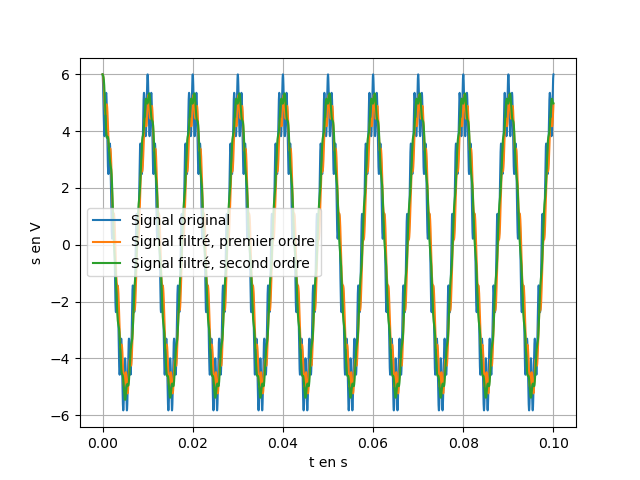

In [12]:
signal_filtre_1o = filtre_PB_1o(s_an_bruit(t_an), 500, t_an[1]-t_an[0])
signal_filtre_2o = filtre_PB_2o(s_an_bruit(t_an), 500, t_an[1]-t_an[0], 3)

plt.figure()
plt.plot(t_an,s_an_bruit(t_an), label='Signal original')
plt.plot(t_an,signal_filtre_1o, label='Signal filtré, premier ordre')
plt.plot(t_an,signal_filtre_2o, label='Signal filtré, second ordre')
plt.legend()
plt.xlabel('t en s')
plt.ylabel('s en V')
plt.grid(True)
plt.show()

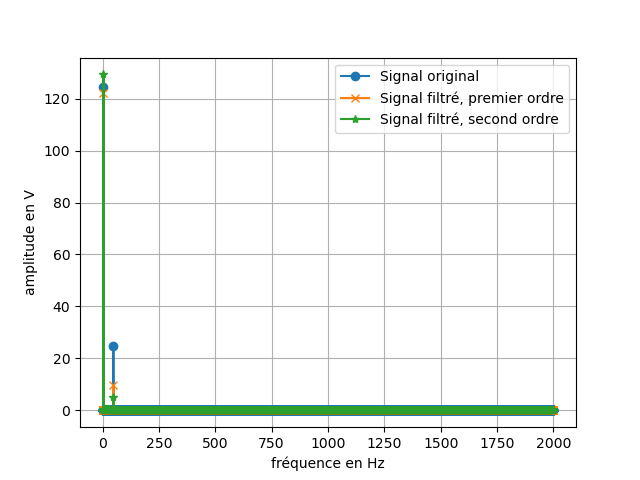

In [13]:
amp = np.abs(np.fft.rfft(s_an_bruit(t_an)/(np.int64(1+Delta_t_ech*f_ech)//2+1)))
amp_filtre_1o = np.abs(np.fft.rfft(signal_filtre_1o/(np.int64(1+Delta_t_ech*f_ech)//2+1)))
amp_filtre_2o = np.abs(np.fft.rfft(signal_filtre_2o/(np.int64(1+Delta_t_ech*f_ech)//2+1)))
freq = np.fft.rfftfreq(len(signal_filtre_1o), d=1/f_ech)

plt.figure()
plt.plot(freq,amp,'-o', label='Signal original')
plt.plot(freq,amp_filtre_1o,'-x', label='Signal filtré, premier ordre')
plt.plot(freq,amp_filtre_2o,'-*', label='Signal filtré, second ordre')
plt.legend()
plt.xlabel('fréquence en Hz')
plt.ylabel('amplitude en V')
plt.grid(True)
plt.show()